## Introdução

### Classificação de porcos ou cachorros Supervisionado


In [1]:
#Features
#pelo longo?
# perna curtas?
# faz auau?

porco1 =[0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

# 1 porco
# 0 cachorro
train_x = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
train_y = [1,1,1,0,0,0] #labels

In [2]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC()

In [3]:
animal = [1,1,1]

In [4]:
model.predict([animal])

array([0])

Testes

In [5]:
animal1 = [1,1,1]
animal2 = [1,1,0]
animal3 = [0,1,1]
test_x = [animal1,animal2,animal3]
test_y = [0,1,1]



In [6]:
previsoes = model.predict(test_x)
previsoes == test_y

array([ True,  True, False])

In [7]:
previsoes


array([0, 1, 0])

In [8]:
test_y

[0, 1, 1]

In [9]:
corretos = (previsoes == test_y).sum()
total = len(test_y)
corretos

2

In [10]:
acerto = corretos/total
round(acerto*100)

67

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy =  accuracy_score(test_y, previsoes)
print(f' A taxa de acerto é {round(accuracy,2)*100}%')

 A taxa de acerto é 67.0%


## Projeto 2

In [13]:
import pandas as pd


In [14]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [15]:
x = df[['home', 'how_it_works', 'contact',]]
y = df['bought']

In [16]:
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: bought, dtype: int64

In [17]:
df.shape

(99, 4)

In [18]:
train_x = x[:75]
train_y = y[:75]
test_x = x[75:]
test_y = y[75:]

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC()

In [20]:
previsoes = model.predict(test_x)


In [21]:
accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")

Acuracia: 96.0%


In [22]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25)

### Usando sklearn para test e train

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                    random_state=20, stratify= y)

model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")

Acuracia: 96.0%


In [24]:
train_y.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [25]:
49/25

1.96

In [26]:
test_y.value_counts()

0    17
1     8
Name: bought, dtype: int64

In [27]:
17/8

2.125

## Dataset projeto web

In [28]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

In [29]:
df = pd.read_csv(url, sep = ',')

In [30]:
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [31]:
df.describe()

,unfinished,expected_hours,price
count,2157.000000,2157.000000,2157.000000
mean,0.474270,50.515531,3140.696801
std,0.499453,28.589513,5079.220196
min,0.000000,1.000000,100.000000
25%,0.000000,26.000000,247.000000
50%,0.000000,51.000000,685.000000
75%,1.000000,75.000000,3668.000000
max,1.000000,100.000000,30223.000000


In [32]:
df.isnull().sum()

unfinished        0
expected_hours    0
price             0
dtype: int64

In [34]:
df['finalized'] = df['unfinished'].map({0:1, 1:0})

In [35]:
df.head()

,unfinished,expected_hours,price,finalized
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [37]:
df = df.drop(columns = ['unfinished'])

In [38]:
df.head()

,expected_hours,price,finalized
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


In [39]:
df.tail()

,expected_hours,price,finalized
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1
2156,37,377,0


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline 

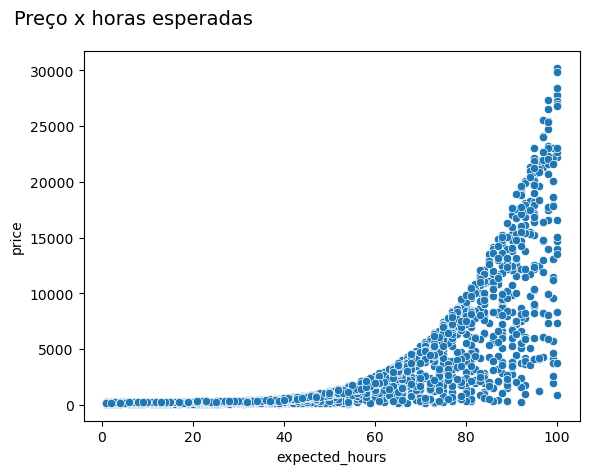

In [53]:
ax = sns.scatterplot(x = 'expected_hours', y ='price', data =df)
ax.set_title('Preço x horas esperadas', x = 0.1, y = 1.05, fontsize = 14)
plt.show()

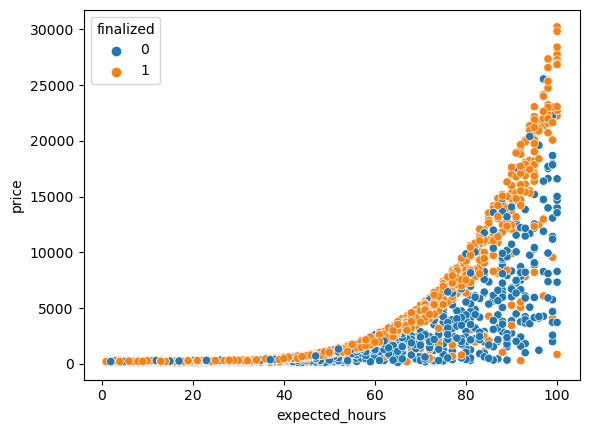

In [56]:
sns.scatterplot(x = 'expected_hours', y ='price', hue = 'finalized', data =df)
ax.set_title('Preço x horas esperadas', x = 0.1, y = 1.05, fontsize = 14)
plt.show()

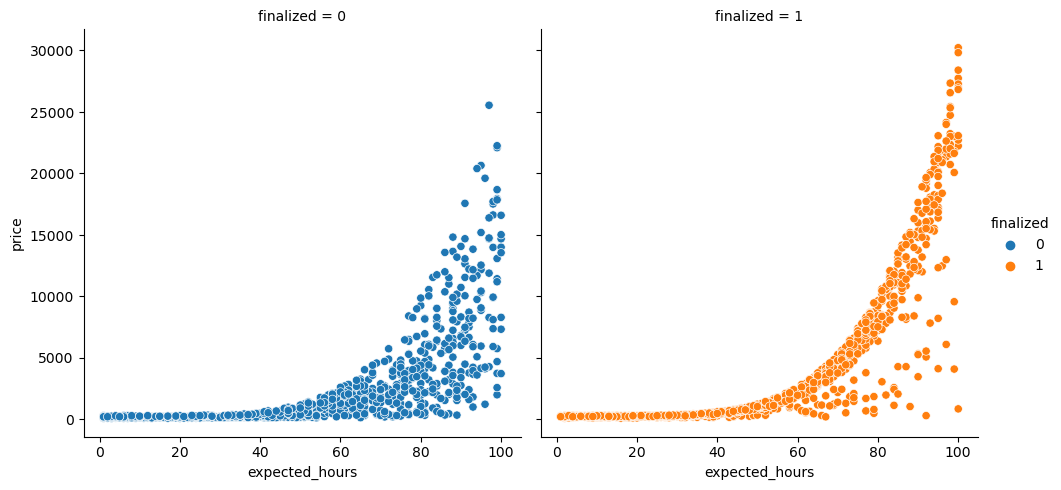

In [62]:
sns.relplot(x = 'expected_hours', y ='price',  hue = 'finalized', col = 'finalized', data =df)
plt.show()

In [64]:
x = df[['expected_hours', 'price']]
y = df['finalized']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                    random_state= 5, stratify= y)

model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")
print(f"Treinado com {len(train_x)} e testado com {len(test_x)}")

Acuracia: 51.0%
Treinado com 1617 e testado com 540


In [119]:
import numpy as np
previsoes_base = np.ones(540) #baseline

In [120]:
print(f"Acuracia: {round(accuracy_score(test_y, previsoes_base),2)*100}%")

Acuracia: 53.0%


O algortimo não é tão bom. Pois, se chutarmos que todos projetos foram concluidos, há pouca diferença.

#### Curva de decisão
Usado em duas dimensões, para visualizar a decisão do algoritmo.

In [121]:
x_min = test_x['expected_hours'].min()
x_max =test_x['expected_hours'].max()
y_min = test_x.price.min()
y_max = test_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [122]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [123]:
#Devolve cada eixo repetido 100 vezes
xx,yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [124]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [125]:
Z = model.predict(pontos)
Z.shape

(10000,)

In [126]:
Z = Z.reshape(xx.shape) #Redmensiona para 100x100

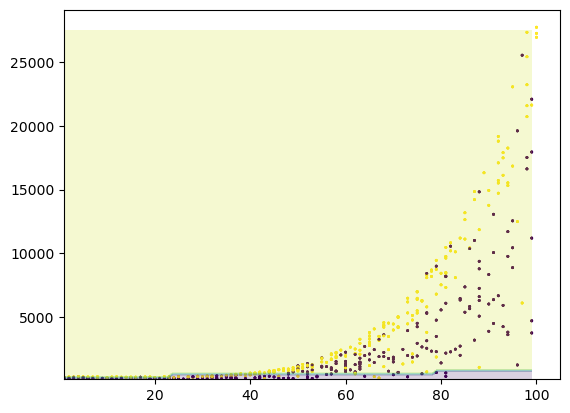

In [117]:
plt.scatter(test_x['expected_hours'], test_x['price'], c = test_y, s=1)
plt.contourf(xx, yy,Z, alpha = 0.2)
plt.show()

Curva de decisão péssima, pois chutou que iria finalizar tudo.

Plotando com outro seed

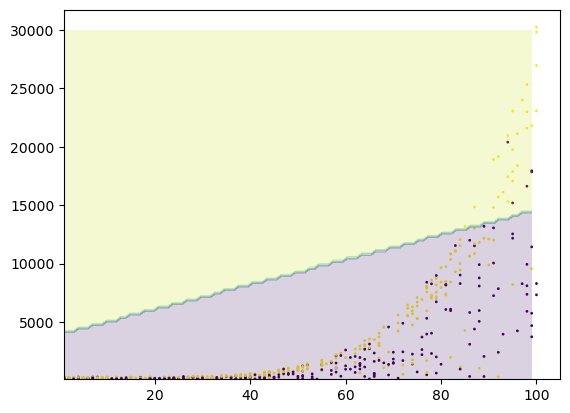

In [127]:
plt.scatter(test_x['expected_hours'], test_x['price'], c = test_y, s=1)
plt.contourf(xx, yy,Z, alpha = 0.2)
plt.show()